In [1]:
import numpy as np
import cv2 as cv
from scipy.io import loadmat
from IPython.display import Image, display
import matplotlib.pyplot as plt
from scipy import signal

In [1]:
def imshow(img):
    ret, encoded = cv.imencode('.jpg', img)
    display(Image(encoded))

#remove x axis overlap of a sorted array(through axis 0)
def remove_overlap(input_array):
    uni_coor = []
    for i in range(input_array[:,0][0], input_array[:,0][-1]+1):
        uni_coor.append(input_array[np.where(input_array[:,0] == i)[0][0]].tolist())
    return np.array(uni_coor)

def merge_list(list):
    return sum(list,[])

def transstrain(straintrans):
    mp5_strain = straintrans.values.tolist()
    resultstrain = []
    for s_strain in mp5_strain:
        resultstrain.append(s_strain)
    return resultstrain

def transstress(stresstrans):
    mp5_stress = stresstrans.values.tolist()
    resultstress = []
    for s_stress in mp5_stress:
        resultstress.append(s_stress)
    return resultstress

def plot(tplot):
    figsize = 80, 60
    figure, ax = plt.subplots(figsize = figsize)
    plt.imshow(tplot, interpolation = 'nearest', cmap = 'Reds')
    plt.colorbar()
    plt.gca().invert_yaxis()
    
def maxdivisor(n):
    num = n //2
    while num >1:
        if n % num ==0:
            print(num)
            break
        else:
            num = num - 1
    else:
        print('prime')
        
def eucliddiscal(resultstressy, resultstressx):
    #* Create matrix of euclidean distance between each point
    distorigin = resultstressy.reshape(-1,1)-resultstressx.reshape(1,-1)

    dtwm = np.zeros((len(resultstressy), len(resultstressx)))
    dtwm[0, 0] = distorigin[0, 0]
    for x1 in range(1, len(resultstressx)):
        dtwm[0, x1] = dtwm[0, x1-1] + distorigin[0, x1]
    for y1 in range(1, len(resultstressy)):
        dtwm[y1, 0] = dtwm[y1-1, 0] + distorigin[y1, 0]
    for x in range(1, len(resultstressy)):
        for y in range(1, len(resultstressx)):
            dtwm[x, y] = min(dtwm[x-1, y-1], dtwm[x-1, y], dtwm[x, y-1]) + distorigin[x, y]

    path = [[len(resultstressx) - 1, len(resultstressy) - 1]]
    x = len(resultstressy) - 1
    y = len(resultstressx) - 1
    while x > 0 and y > 0:
        if x == 0:
            y = y - 1
        elif y == 0:
            x = x - 1
        else:
            if dtwm[x-1, y] == min(dtwm[x-1, y-1], dtwm[x-1, y], dtwm[x, y-1]):
                x = x - 1
            elif dtwm[x, y-1] == min(dtwm[x-1, y-1], dtwm[x-1, y], dtwm[x, y-1]):
                y = y - 1
            else:
                x = x - 1
                y = y - 1
        path.append([y, x])
    path.append([0,0])
    path = np.array(path)
    pointx, pointy = path[:,0], path[:,1]
    eudis = sum((resultstressy[pointy[i]] - resultstressx[pointx[i]])**2 for i in range(len(pointx)))
    return eudis

fuji_ridge = np.load('/Users/wz/OneDrive/OneDrive - Kyoto University/Project/fujifitting/sub_mountains/fuji/fuji.npy')

In [22]:
#kaimontake
# mat_path = 'C:/Users/yaoho/OneDrive - Kyoto University/Project/fujifitting/sub_mountains/kaimon.mat'
mat_path = '/Users/wz/OneDrive/OneDrive - Kyoto University/Project/fujifitting/sub_mountains/youtei/youtei.mat'
_ = loadmat(mat_path)
ridge_data = _['l']
ridge_data

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.25873234, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

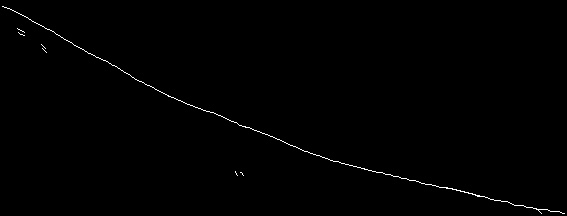

In [39]:
ret,thresh1 = cv.threshold(ridge_data,0.09,255,cv.THRESH_BINARY)
imshow(thresh1)

In [40]:
line_index = np.where(thresh1 == 255)
line_x = np.expand_dims(line_index[0], axis=0)
line_y = np.expand_dims(line_index[1], axis=0)
line_coor = np.concatenate([line_x, line_y], axis=0).T
chosen_coor = []

In [41]:
for i, j in zip(line_coor[:,1], line_coor[:,0]):
    chosen_coor.append([i, j])

In [42]:
chosen_coor = remove_overlap(np.array(chosen_coor))
# chosen_coor = np.delete(chosen_coor, [0,1,2,3,4,5,6,7,8], 0)
chosen_coor = chosen_coor - np.expand_dims(chosen_coor[0], axis = 0)
chosen_coor[:,1] = chosen_coor[:,1][-1] - chosen_coor[:,1]

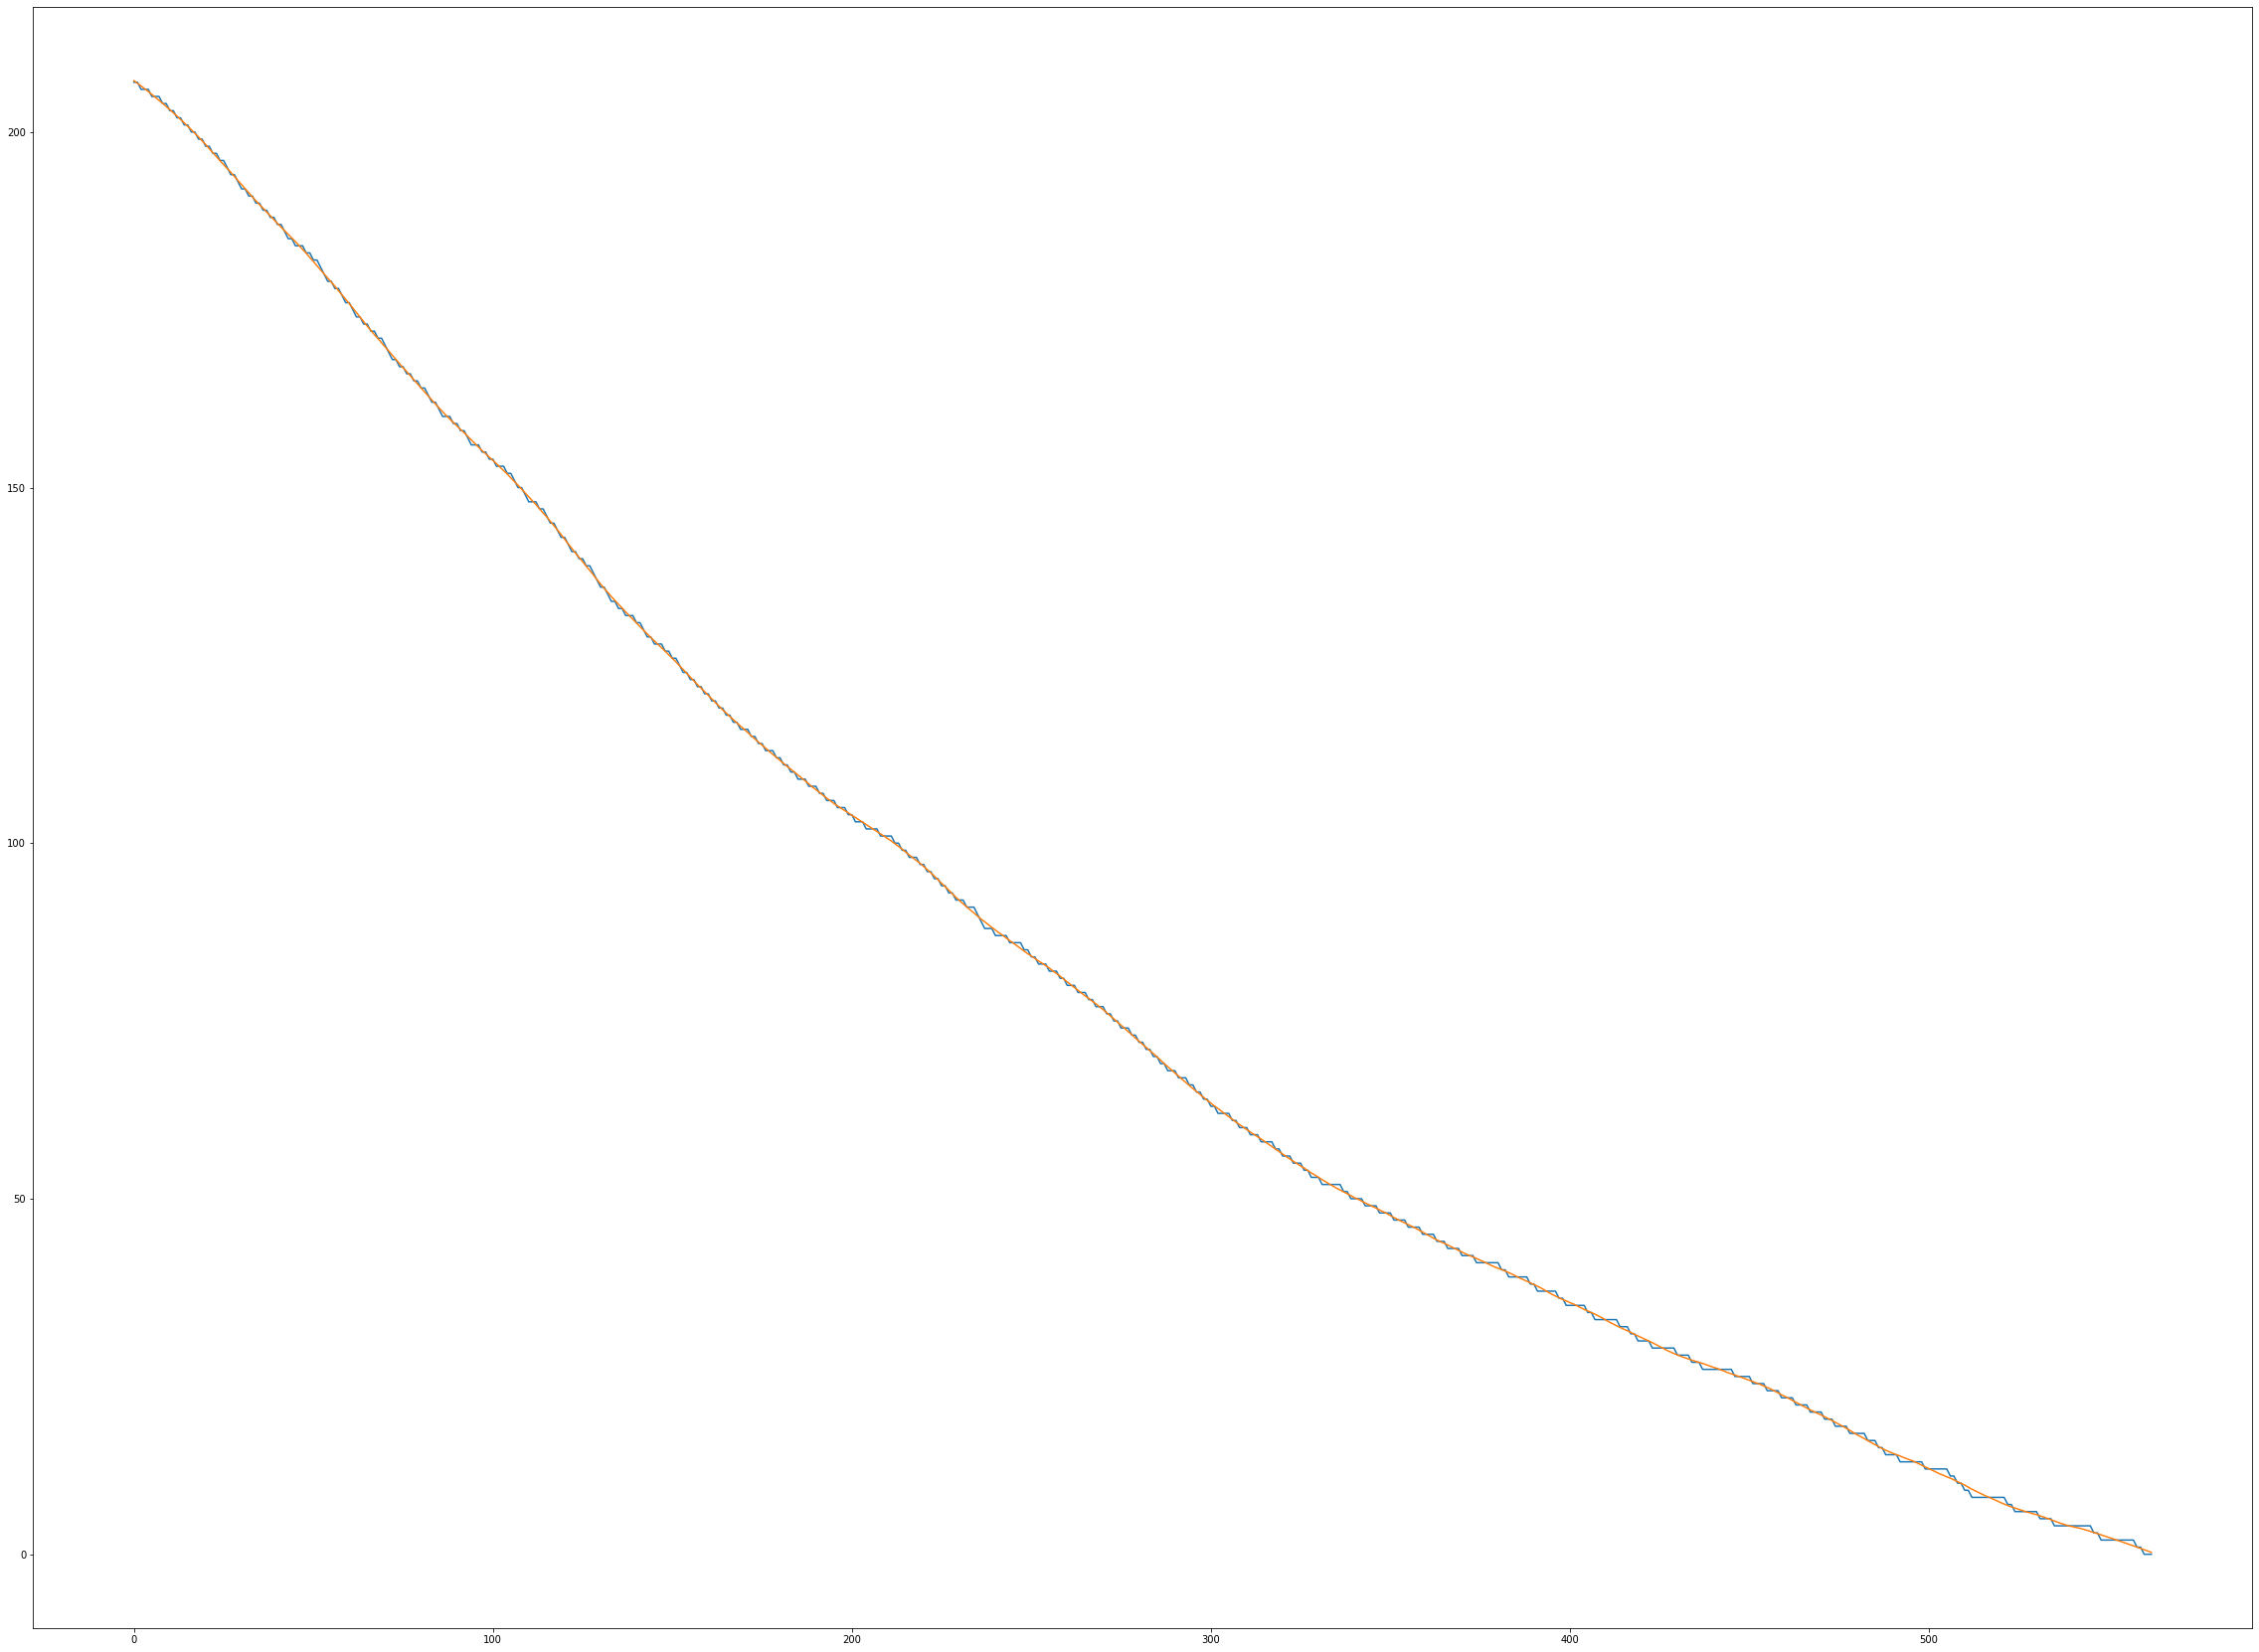

In [45]:
fig, ax = plt.subplots(figsize = (40, 30))
#Savitzky-Golay smoothing
window_size = 144
chosen_sg = signal.savgol_filter(chosen_coor[:,1], int(window_size/4+1), 2) #parameters: window_length and polyorder
plt.plot(chosen_coor[:,0], chosen_coor[:,1])
plt.plot(chosen_sg)

In [46]:
chosen_sg = chosen_sg[::-1]
youtei_ridge = chosen_sg.copy()

In [48]:
np.save('/Users/wz/OneDrive/OneDrive - Kyoto University/Project/fujifitting/sub_mountains/youtei/youtei.npy', youtei_ridge)

In [51]:
#fuji
mat_path = 'C:/Users/yaoho/OneDrive - Kyoto University/Project/fujifitting/sub_mountains/fuji.mat'
mat_path = '/Users/wz/OneDrive/OneDrive - Kyoto University/Project/fujifitting/sub_mountains/fuji/fuji.mat'
_ = loadmat(mat_path)
ridge_data = _['l']

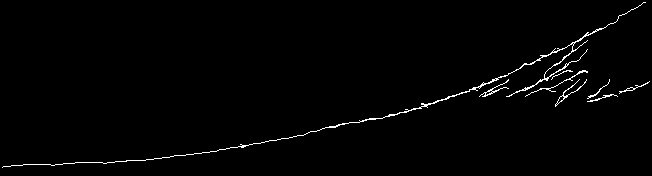

In [52]:
ret,thresh1 = cv.threshold(ridge_data,0.01,255,cv.THRESH_BINARY)
imshow(thresh1)

In [53]:
line_index = np.where(thresh1 == 255)
line_x = np.expand_dims(line_index[0], axis=0)
line_y = np.expand_dims(line_index[1], axis=0)
line_coor = np.concatenate([line_x, line_y], axis=0).T
line_coor
#same y-axis lowest x-axis

array([[  2, 643],
       [  2, 644],
       [  2, 645],
       ...,
       [166,   9],
       [166,  10],
       [167,   2]])

In [54]:
chosen_coor = []
for i, j in zip(line_coor[:,1], line_coor[:,0]):
    chosen_coor.append([i, j])
chosen_coor = np.array(chosen_coor)

In [55]:
chosen_coor

array([[643,   2],
       [644,   2],
       [645,   2],
       ...,
       [  9, 166],
       [ 10, 166],
       [  2, 167]])

In [56]:
chosen_coor = chosen_coor[chosen_coor[:, 1].argsort()]
uni_coor = []
for i in range(np.min(chosen_coor[:,0]), np.max(chosen_coor[:,0])+1):
    ind = np.where(chosen_coor[:,0] == i)[0]
    if len(ind) >= 1:
        uni_coor.append(chosen_coor[ind[0]])
uni_coor = np.array(uni_coor)
uni_coor = uni_coor[uni_coor[:,0].argsort()]
uni_coor

array([[  2, 167],
       [  3, 166],
       [  4, 166],
       ...,
       [647,  82],
       [648,  82],
       [649,  81]])

In [57]:
uni_coor[:,0] = uni_coor[:,0] - uni_coor[:,0][0]
uni_coor[:,1] = uni_coor[:,1][0] - uni_coor[:,1]

In [64]:
uni_coor = np.delete(uni_coor, [-1], 0)

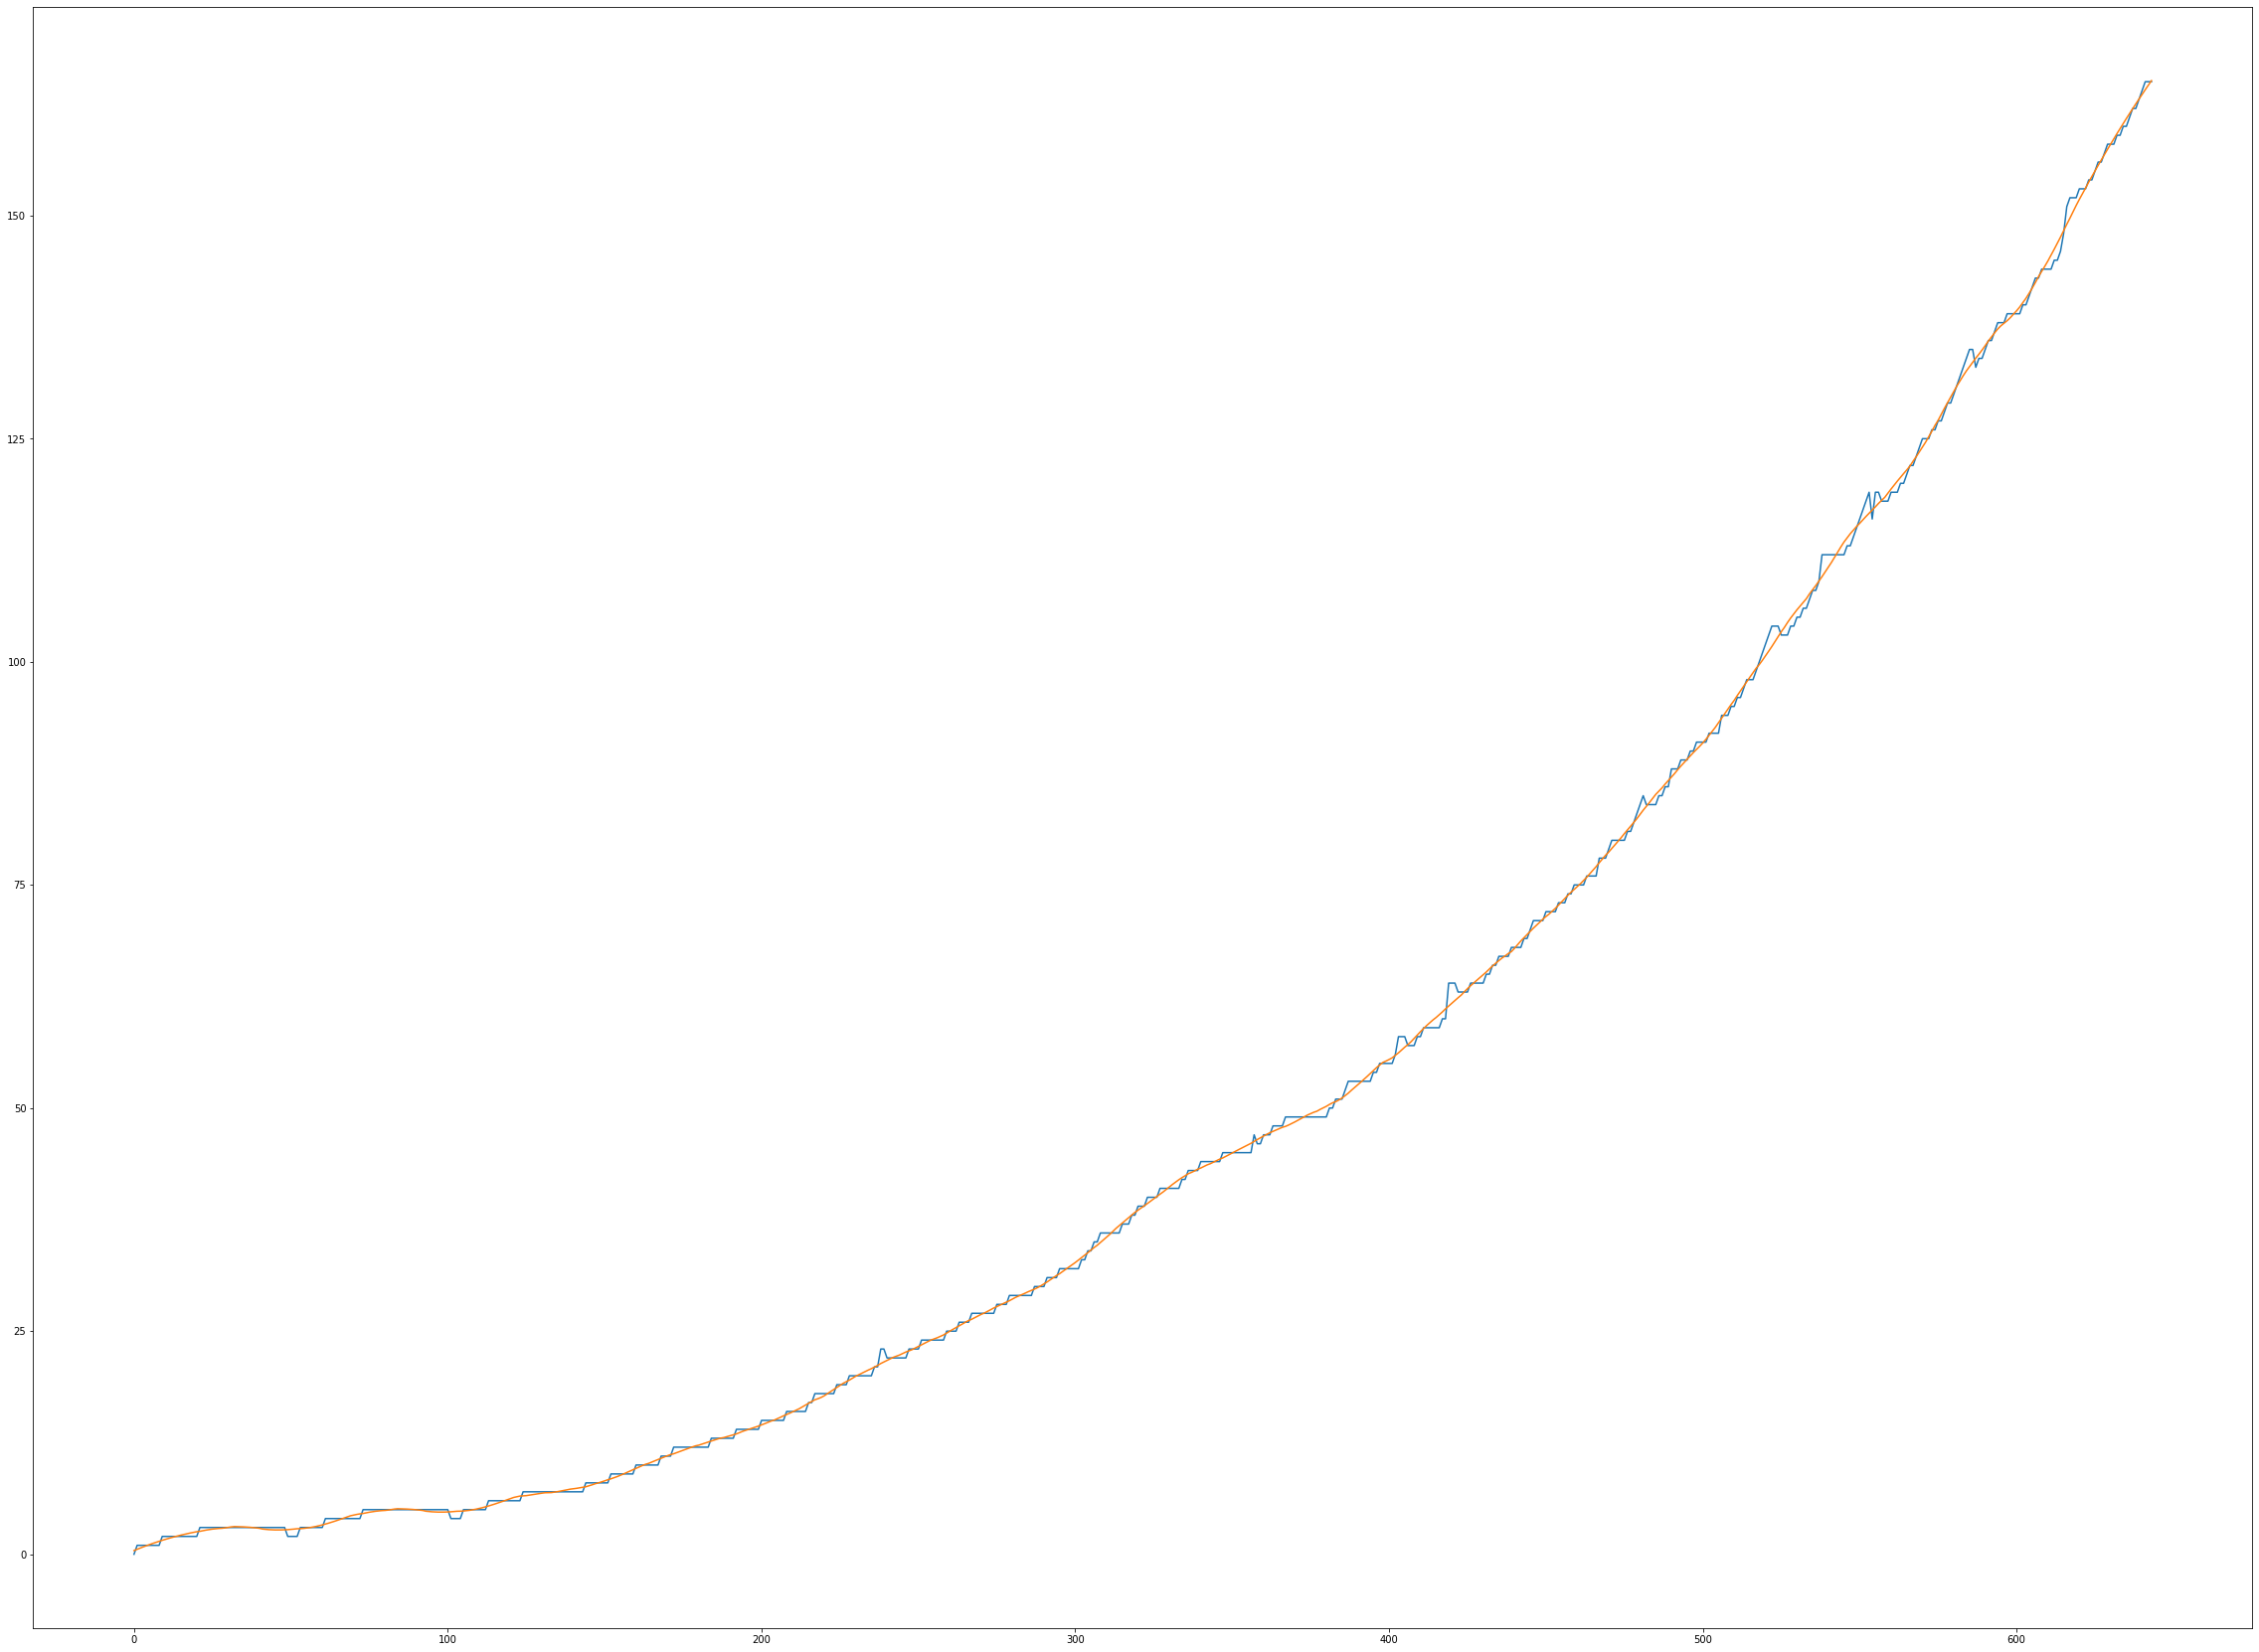

In [66]:
fig, ax = plt.subplots(figsize = (40, 30))
#Savitzky-Golay smoothing
window_size = 160
chosen_sg = signal.savgol_filter(uni_coor[:,1], int(window_size/4+1), 2) #parameters: window_length and polyorder
plt.plot(uni_coor[:,0], uni_coor[:,1])
plt.plot(chosen_sg)

In [67]:
fuji_ridge = chosen_sg.copy()

In [68]:
np.save('/Users/wz/OneDrive/OneDrive - Kyoto University/Project/fujifitting/sub_mountains/fuji/fuji.npy', fuji_ridge)

In [2]:
#mayon_volcano
mat_path = 'C:/Users/yaoho/OneDrive - Kyoto University/Project/fujifitting/sub_mountains/mayon_volcano.mat'
mat_path = '/Users/wz/OneDrive/OneDrive - Kyoto University/Project/fujifitting/sub_mountains/mayon_volcano/mayon_volcano.mat'
_ = loadmat(mat_path)
ridge_data = _['l']

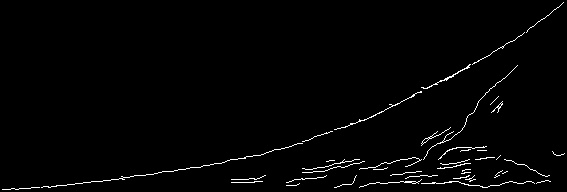

In [3]:
ret,thresh1 = cv.threshold(ridge_data,0.05,255,cv.THRESH_BINARY)
imshow(thresh1)

In [4]:
line_index = np.where(thresh1 == 255)
line_x = np.expand_dims(line_index[0], axis=0)
line_y = np.expand_dims(line_index[1], axis=0)
line_coor = np.concatenate([line_x, line_y], axis=0).T
line_coor
#same y-axis lowest x-axis

array([[  2, 563],
       [  3, 562],
       [  4, 561],
       ...,
       [189,  16],
       [189,  17],
       [189,  18]])

In [5]:
chosen_coor = []
for i, j in zip(line_coor[:,1], line_coor[:,0]):
    chosen_coor.append([i, j])
chosen_coor = np.array(chosen_coor)

In [81]:
chosen_coor

array([[563,   2],
       [562,   3],
       [561,   4],
       ...,
       [  8, 189],
       [  9, 189],
       [ 10, 189]])

In [11]:
chosen_coor = chosen_coor[chosen_coor[:, 1].argsort()]
uni_coor = []
for i in range(np.min(chosen_coor[:,0]), np.max(chosen_coor[:,0])+1):
    ind = np.where(chosen_coor[:,0] == i)[0]
    if len(ind) >= 1:
        uni_coor.append(chosen_coor[ind[0]])
uni_coor = np.array(uni_coor)
uni_coor = uni_coor[uni_coor[:,0].argsort()]
uni_coor

array([[  2, 189],
       [  3, 189],
       [  4, 189],
       ...,
       [562,   3],
       [563,   2],
       [564, 153]])

In [12]:
uni_coor[:,0] = uni_coor[:,0] - uni_coor[:,0][0]
uni_coor[:,1] = uni_coor[:,1][0] - uni_coor[:,1]

In [13]:
#abnormal detection
abnormal_list = []
for i in range(len(uni_coor)):
    if (i <= len(uni_coor)-11
        and i >= 10):
        if (uni_coor[:,1][i-10] < uni_coor[:,1][i]
            and uni_coor[:,1][i] > uni_coor[:,1][i+10]):
            abnormal_list.append(i)
    
abnormal_list

[320, 458, 512, 551]

In [94]:
#[a,b] include b not include a, abnormal removing!
for i in abnormal_list:
    uni_coor[:,1][i] = (np.mean(uni_coor[:,1][i-11:i-1])+np.mean(uni_coor[:,1][i:i+10]))/2

In [14]:
uni_coor = np.delete(uni_coor, abnormal_list, 0)

In [40]:
def find_best_window(test_array, base_array):
    gothrough_list = []
    for poly_ind in range(1,3):
        for i in range(2, int(len(test_array)/8)-1):
            window_size = i*8
            chosen_sg = signal.savgol_filter(test_array[:,1], int(window_size/4+1), poly_ind)
            l2_dis = eucliddiscal(chosen_sg, base_array)
            gothrough_list.append([l2_dis, i*8, poly_ind])
    gothrough_list = np.array(gothrough_list)
    best_ind = np.where(gothrough_list[:,0] == np.min(gothrough_list[:,0]))[0][0]
    worst_ind = np.where(gothrough_list[:,0] == np.max(gothrough_list[:,0]))[0][0]
    return gothrough_list[best_ind], gothrough_list[worst_ind]

In [26]:
uni_coor = np.delete(uni_coor, [-1, -39, 466, 329], 0)

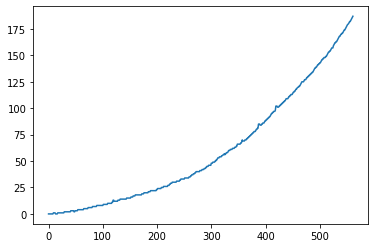

In [27]:
plt.plot(uni_coor[:,0], uni_coor[:,1])

[2.64022679e+03 5.36000000e+02 1.00000000e+00]
2640.2267889733953
4226.005530437864


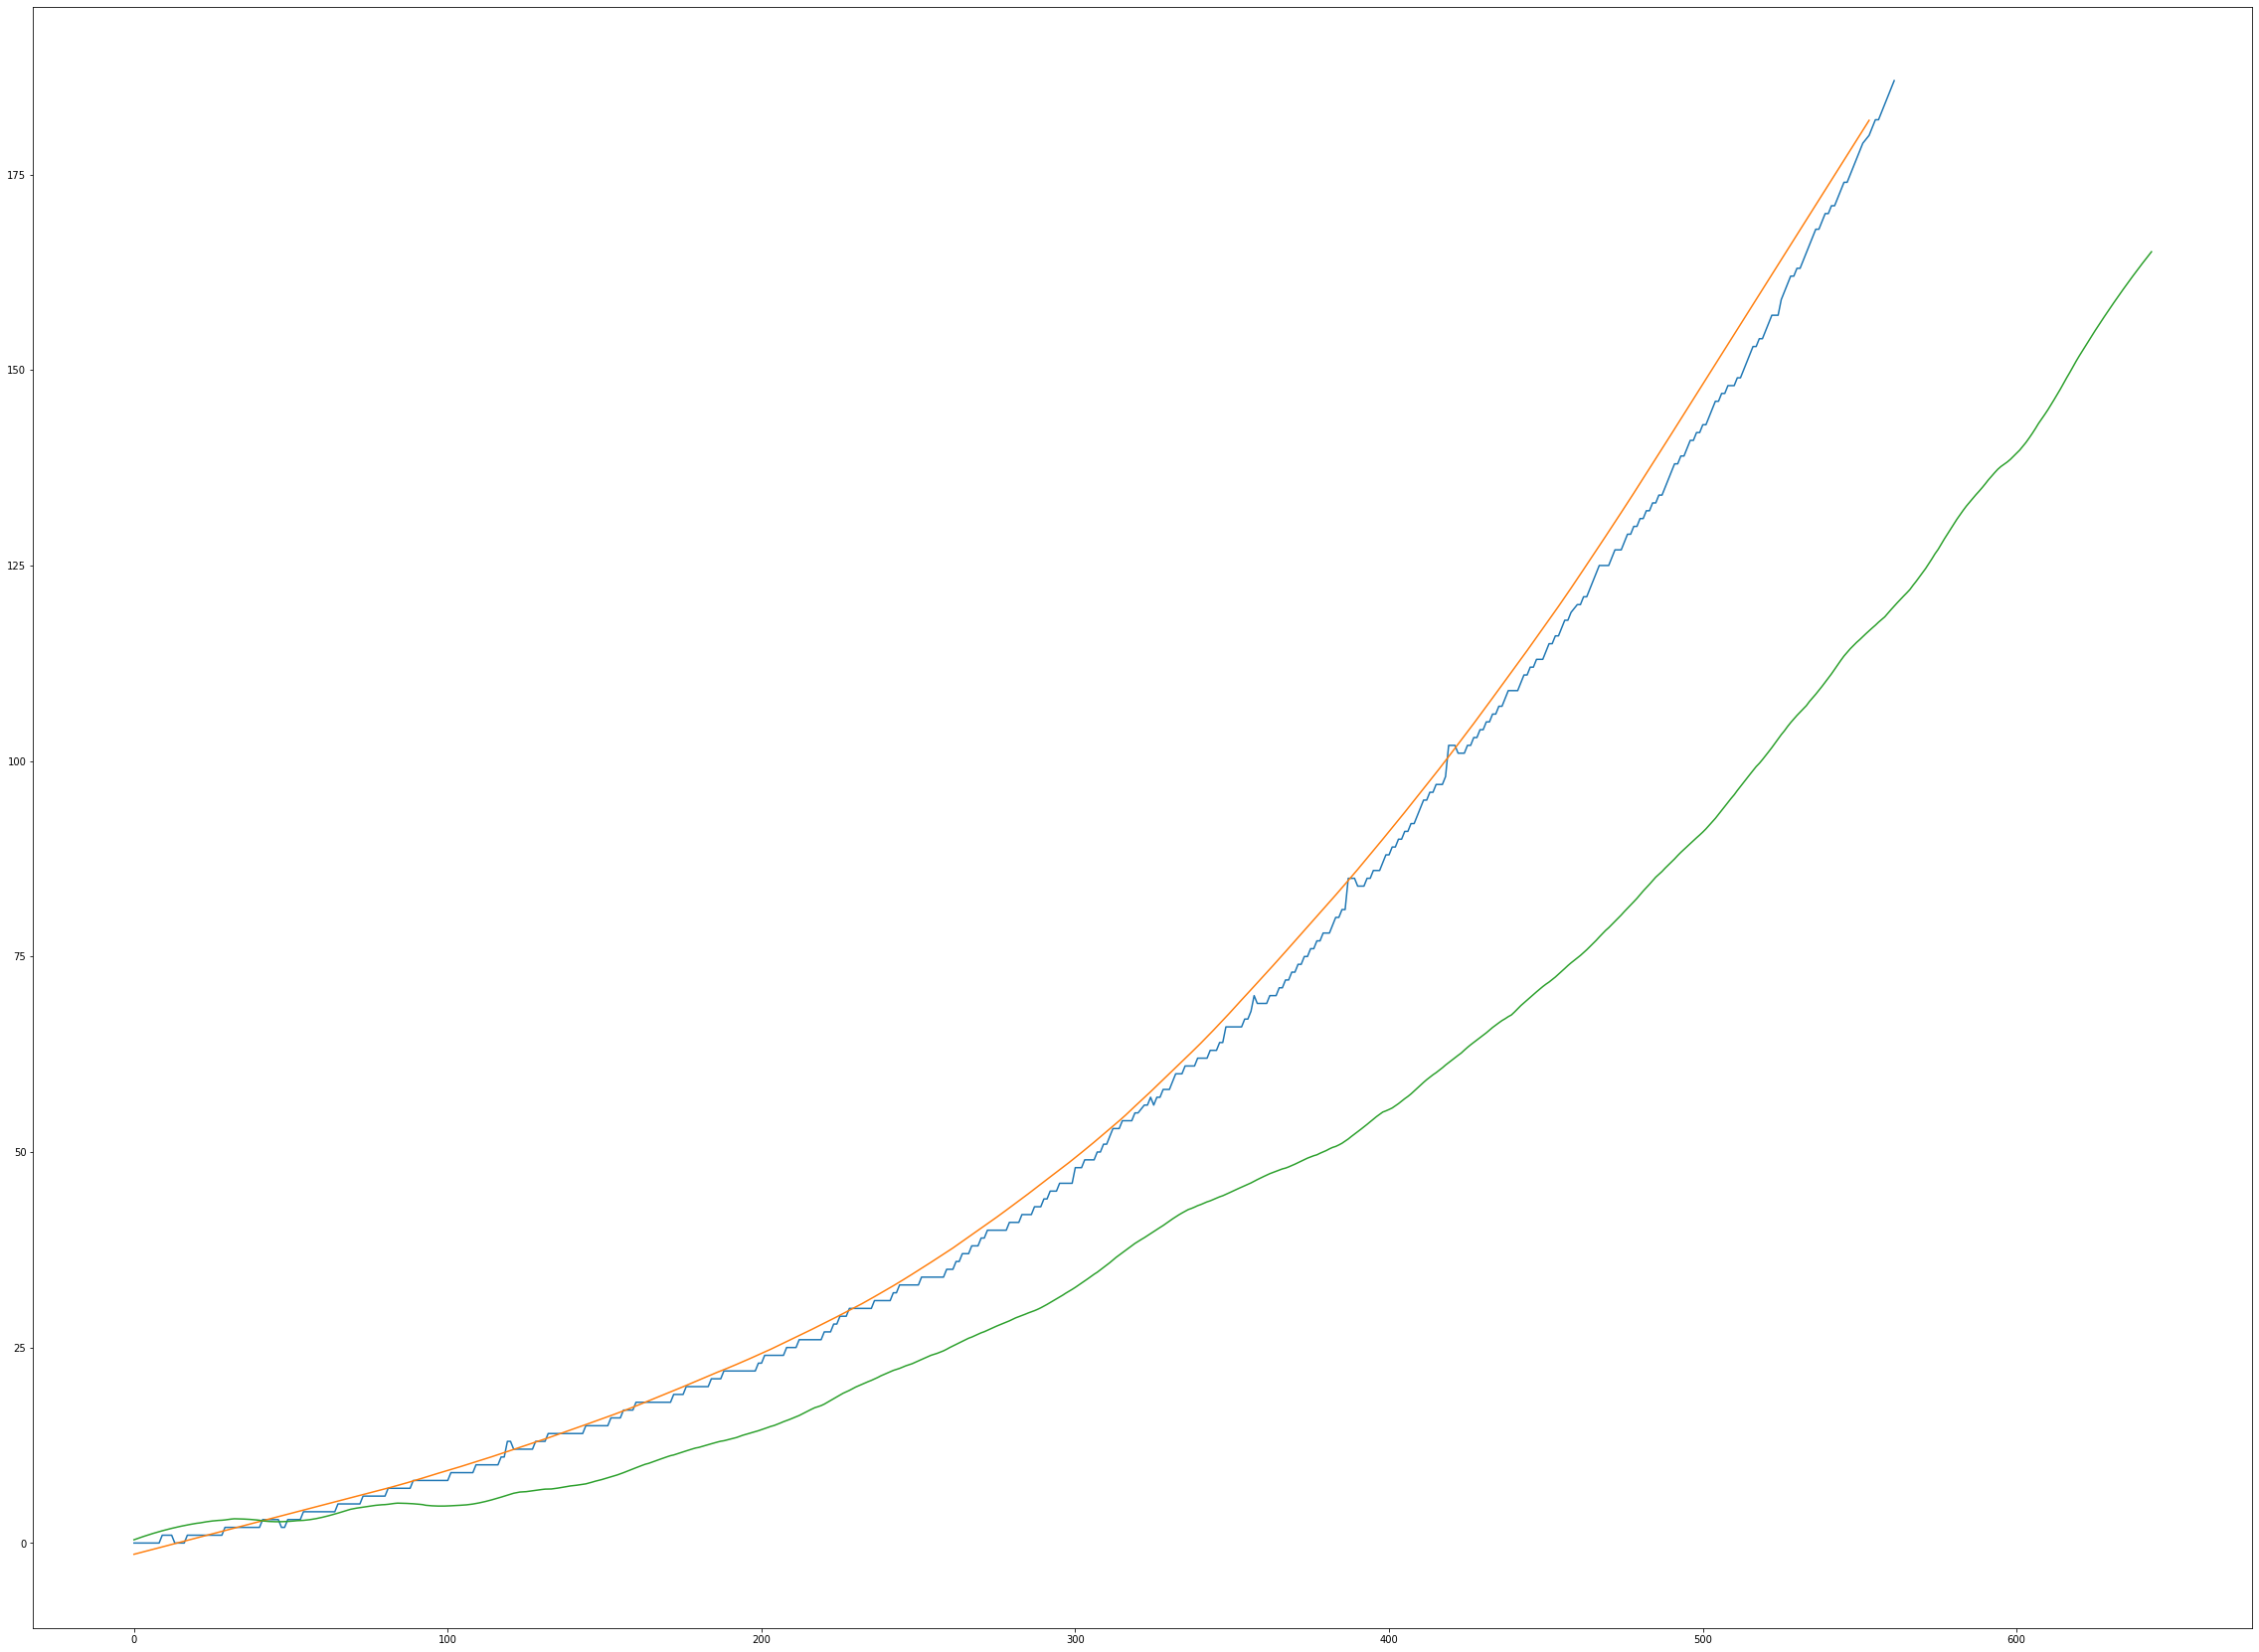

In [41]:
fig, ax = plt.subplots(figsize = (40, 30))
best_ind, worst_ind = find_best_window(uni_coor, fuji_ridge)
#Savitzky-Golay smoothing
window_size = best_ind[1]
poly_ind = best_ind[2]
eud_dis = best_ind[0]
eud_dis_worst = worst_ind[0]
chosen_sg = signal.savgol_filter(uni_coor[:,1], int(window_size/4+1), int(poly_ind)) #parameters: window_length and polyorder
plt.plot(uni_coor[:,0], uni_coor[:,1])
plt.plot(chosen_sg)
plt.plot(fuji_ridge)
print(best_ind)
print(eud_dis)
print(eud_dis_worst)

In [42]:
mayon_volcano_ridge = chosen_sg.copy()

In [43]:
# np.save('C:/Users/yaoho/OneDrive - Kyoto University/Project/fujifitting/sub_mountains/mayon_volcano/mayon_volcano.npy', mayon_volcano_ridge)
np.save('/Users/wz/OneDrive/OneDrive - Kyoto University/Project/fujifitting/sub_mountains/mayon_volcano/mayon_volcano.npy', mayon_volcano_ridge)

Manually track the curve and gen the curve on (x, y) coords..

In [143]:
eucliddiscal(kaimon_ridge, fuji_ridge)

200420.62131044283

In [144]:
eucliddiscal(nantai_ridge, fuji_ridge)

138858.01311764919

In [70]:
eucliddiscal(youtei_ridge, fuji_ridge)

51469.92086581555

In [153]:
eucliddiscal(daisen_ridge, fuji_ridge)

144034.5546786481

In [26]:
eucliddiscal(daimonji_ridge, fuji_ridge)

545507.8441759384